<a href="https://colab.research.google.com/github/bcury/Machine-Learning-Projects/blob/main/Auto_ML_Classification_Churn_H20_AutoKeras_MLBOX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lib H20

In [ ]:
pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd

h2o.init()

#Importa dados e divide em treino e teste
imp = pd.read_csv('Churn_treino.csv', sep=";")
imp = h2o.H2OFrame(imp)
treino,teste = imp.split_frame(ratios=[.7])

#Transforma a variável dependente em fator
treino["Exited"] = treino["Exited"].asfactor()
teste["Exited"] = teste["Exited"].asfactor()

#Busca o modelo por 60 segundos, podemos em vez disso definir max_models
modelo = H2OAutoML(max_runtime_secs=60)
modelo.train( y="Exited", training_frame=treino)

#Ranking dos melhores
ranking = modelo.leaderboard
ranking = ranking.as_data_frame()

#Prever 
teste = pd.read_csv('Churn_prever.csv', sep=";")
teste = h2o.H2OFrame(teste)
prever = modelo.leader.predict(teste)
prever = prever.as_data_frame(prever)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.15" 2022-04-19; OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpjn7cimt8
  JVM stdout: /tmp/tmpjn7cimt8/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpjn7cimt8/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.3
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_2g68bl
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
prever

,predict,p0,p1
0,0,0.927846,0.072154
1,0,0.938973,0.061027
2,1,0.033352,0.966648
3,0,0.976565,0.023435
4,0,0.922064,0.077936
5,0,0.920497,0.079503
6,0,0.748518,0.251482
7,0,0.941067,0.058933
8,0,0.874548,0.125452


Lib AutoKeras

In [15]:
pip install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow-2.9.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (511.7 MB)
  Using cached numpy-1.21.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
  Using cached tensorboard-2.9.1-py3-none-any.whl (5.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.2
    Uninstalling numpy-1.18.2:
      Successfully uninstalled numpy-1.18.2
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.0.1
    Uninstalling tensorflow-estimator-2.0.1:
      Successfully uninstalled tensorflow-estimator-2.0.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.0.2
    Uninstalling tensorboard-2.0.2:
      Successfully uninstalled tensorboard-2.0.2
  Attempting uninstall: tensorflow
    Fou

In [ ]:
imp.head()

CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
619,France,Female,42,2,0,1,1,1,1.01349e+07,1
608,Spain,Female,41,1,8.38079e+06,1,0,1,1.12543e+07,0
502,France,Female,42,8,1.59661e+06,3,1,0,1.13932e+07,1
699,France,Female,39,1,0,2,0,0,9.38266e+06,0
850,Spain,Female,43,2,1.25511e+07,1,1,1,790841,0
645,Spain,Male,44,8,1.13756e+07,2,1,0,1.49757e+07,1
822,France,Male,50,7,0,2,1,1,100628,0
376,Germany,Female,29,4,1.15047e+07,4,1,0,1.19347e+07,1
501,France,Male,44,4,1.42051e+07,2,0,1,749405,0
684,France,Male,27,2,1.34604e+07,1,1,1,7.17257e+06,0


In [1]:
import autokeras as ak
import pandas as pd

#Importa dados
imp = pd.read_csv('Churn_treino.csv', sep=";")

#Separa variaveis independentes da classe
x = imp.iloc[:,0:10]
y = imp.iloc[:,10]

# Inicializa com 10 modelos diferentes
modelo = ak.StructuredDataClassifier(max_trials=10) 

#Cria o modelo
modelo.fit( x= x, y =y, epochs=100)

#Previsão
prever = pd.read_csv('Churn_prever.csv', sep=";")
previsao = modelo.predict(prever)

INFO:tensorflow:Reloading Oracle from existing project ./structured_data_classifier/oracle.json
INFO:tensorflow:Reloading Tuner from ./structured_data_classifier/tuner0.json
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute '

Lib mlbox

In [13]:
pip install mlbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.18.2-cp37-cp37m-manylinux1_x86_64.whl (20.2 MB)
  Using cached tensorflow-2.0.0-cp37-cp37m-manylinux2010_x86_64.whl (86.3 MB)
  Using cached tensorflow_estimator-2.0.1-py2.py3-none-any.whl (449 kB)
  Using cached tensorboard-2.0.2-py3-none-any.whl (3.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.1
    U


reading csv : Churn_treino.csv ...
cleaning data ...
CPU time: 8.696735382080078 seconds

reading csv : Churn_teste.csv ...
cleaning data ...
CPU time: 0.20542478561401367 seconds

> Number of common features : 10

gathering and crunching for train and test datasets ...
reindexing for train and test datasets ...
dropping training duplicates ...
dropping constant variables on training set ...

> Number of categorical features: 2
> Number of numerical features: 8
> Number of training samples : 10000
> Number of test samples : 2474

> You have no missing values on train set...

> Task : classification
0.0    7963
1.0    2037
Name: Exited, dtype: int64

encoding target ...

computing drifts ...
CPU time: 0.7295377254486084 seconds

> Top 10 drifts

('CreditScore', 0.039029506871463227)
('Balance', 0.036350121261115476)
('Age', 0.03163581244947444)
('EstimatedSalary', 0.01662118027485837)
('HasCrCard', 0.012770008084074469)
('Gender', 0.0063882780921584725)
('Tenure', 0.002330476960388239)

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:74: UserWarning: Optimiser will save all your fitted models into directory 'save/joblib'. Please clear it regularly.
  +str(self.to_path)+"/joblib'. Please clear it regularly.")


MEAN SCORE : neg_log_loss = -0.3953278943317498
VARIANCE : 0.0037817845316901466 (fold 1 = -0.39910967886343995, fold 2 = -0.39154610980005966)
CPU time: 7.037454843521118 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'variance', 'threshold': 0.3}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.39358106341716226, 'boosting_type': 'gbdt', 'class_weight': None, 'importance_type': 'split', 'learning_rate': 0.05, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthr

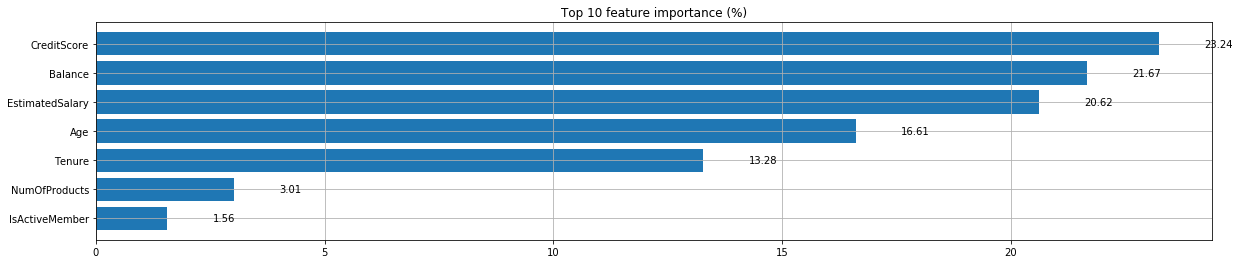


> Feature importances dumped into directory : save

predicting ...
CPU time: 0.15732693672180176 seconds

> Overview on predictions : 

        0.0       1.0  Exited_predicted
0  0.706120  0.293880                 0
1  0.980511  0.019489                 0
2  0.936784  0.063216                 0
3  0.207324  0.792676                 1
4  0.370915  0.629085                 1
5  0.952282  0.047718                 0
6  0.928365  0.071635                 0
7  0.635891  0.364109                 0
8  0.353668  0.646332                 1
9  0.760367  0.239633                 0

dumping predictions into directory : save ...


In [ ]:
from mlbox.preprocessing import *
from mlbox.optimisation import *
from mlbox.prediction import *

#Caminho dos arquivos de treino e teste
caminho = ["Churn_treino.csv","Churn_teste.csv"]

#prepara os dados, exclui colunas inuteis, define tipos, extrai informaçõeses importantes etc
imp = Reader(sep = ";")
dados = imp.train_test_split(caminho, "Exited")

#Drif
rdrift = Drift_thresholder()
dados = rdrift.fit_transform(dados)

#Objeto otimizador
otimizador = Optimiser()

#Paramametros do otimizaodr, do tipo dicionário
espaco = {
     'fs__strategy':{"search":"choice","space":["variance","rf_feature_importance"]},
     'est__colsample_bytree':{"search":"uniform", "space":[0.3,0.7]}
}

#Criacao do modelo de fato
# max_evals é as interação, default é 40
modelo = otimizador.optimise(espaco,dados,max_evals=15)

#previsão
previsor = Predictor()
previsor.fit_predict(modelo, dados)